<p align="center">
  <img src="Cognifyz.png" alt="Your Image Description" />
</p>


#

## Level -1

In [119]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [120]:
#reading the datset
df = pd.read_csv('Dataset .csv')
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [121]:
# Data set basic Understanding 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [122]:
#checking rows and columns
df.shape

(9551, 21)

In [123]:
#checking nulls
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [124]:
#checking duplicates
df[df.duplicated()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes


#### The dataset seems to be clean and ready for performing the assigned tasks .... Lets begin...

## Task-1

<p align="center">
  <img src="Level-1 T-1.png" alt="Your Image Description" />
</p>


### 1. Determine the top three most common cuisines in the dataset.

In [125]:
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


In [126]:
df.Cuisines.value_counts()

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

**OOPS there is a mix match between Cuisines type in the column as some restaurant serve  multiple cusinies , we need to fix that**

In [127]:
# 1. Create a copy of the original DataFrame to avoid modifying the original one
df_cleaned = df.copy()

# 2. Fill NaN values in 'Cuisines' column with an empty string (or you can choose another placeholder)
df_cleaned['Cuisines'] = df_cleaned['Cuisines'].fillna('')

# 3. Ensure all values are strings, then split cuisines and normalize
df_cleaned['Cuisines'] = df_cleaned['Cuisines'].apply(lambda x: str(x).split(', ') if x else [])

# 4. Explode the 'Cuisines' column to create separate rows for each cuisine
df_exploded = df_cleaned.explode('Cuisines', ignore_index=True)

# 5. Clean up whitespace (if any) and count the cuisines
df_exploded['Cuisines'] = df_exploded['Cuisines'].str.strip()  # Remove leading/trailing spaces


In [128]:
# Now you can get the value counts for individual cuisines
Top_3_most_common_cusinies = df_exploded['Cuisines'].value_counts().head(3)
Top_3_most_common_cusinies 

Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64

#

**The top 3 most common Cuisines are North Indian , Chinese , Fast Food**

#

### 2. Calculate the percentage of restaurants that serve each of the top cuisines.

In [129]:
top_cuisines = ['North Indian', 'Chinese', 'Fast Food']

#  Calculate the number of restaurants that serve each cuisine
restaurants_serving_each_cuisine = {}

# Loop through each top cuisine
for cuisine in top_cuisines:
    # Filter restaurants that serve the current cuisine
    restaurants_serving_cuisine = df_exploded[df_exploded['Cuisines'] == cuisine]['Restaurant Name'].unique()
    
    # Calculate the number of restaurants serving the current cuisine
    num_restaurants_serving_cuisine = len(restaurants_serving_cuisine)
    
    # Store the result
    restaurants_serving_each_cuisine[cuisine] = num_restaurants_serving_cuisine

# Calculate the total number of unique restaurants
total_num_of_restaurants = len(df['Restaurant Name'].unique())

# Calculate the percentage of restaurants that serve each of the top cuisines
percentage_serving_each_cuisine = {
    cuisine: (num_restaurants / total_num_of_restaurants) * 100
    for cuisine, num_restaurants in restaurants_serving_each_cuisine.items()
}

# Output the results
for cuisine in top_cuisines:
    print(f"Percentage of restaurants that serve {cuisine}: {percentage_serving_each_cuisine[cuisine]:.2f}%")


Percentage of restaurants that serve North Indian: 44.45%
Percentage of restaurants that serve Chinese: 31.47%
Percentage of restaurants that serve Fast Food: 17.69%


### Summary Task 1
**Top Three Cuisines**

- North Indian 
- Chinese 
- Fast Food

**Percentage of restaurants that serve each of the top cuisines**

- Percentage of restaurants that serve North Indian cuisines : 44.45% %
- Percentage of restaurants that serve Chinese cuisines : 31.47% 
- Percentage of restaurants that serve Fast Food cuisines : 17.69 %

#

## Task- 2

<p align="center">
  <img src="Level-1 T-2.png" alt="Your Image Description" />
</p>


### 1. Identify the city with the highest number of restaurants in the dataset.

In [130]:
city_with_most_num_restaurant = df['City'].value_counts()
print(city_with_most_num_restaurant.head(1))

City
New Delhi    5473
Name: count, dtype: int64


### 2. Calculate the average rating for restaurants in each city.

In [131]:
# Step 1: Group by 'City' and calculate the average of 'Aggregate rating'
city_average_rating = df.groupby('City')['Aggregate rating'].mean()

# Step 2: Display the results
print(city_average_rating)


City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


### 3. Determine the city with the highest average rating.

In [132]:
highest_average_rating = df.groupby('City')['Aggregate rating'].mean().reset_index()
highest_average_rating = highest_average_rating.sort_values(by='Aggregate rating',ascending=False)
highest_average_rating.head(1)

,City,Aggregate rating
56,Inner City,4.9


### Summary Task 2

- New delhi city has higest 5473 number of restaurants.
- Average rating for restaurants in each city is given above.
- The Inner City is Higest avg rating 4.9.


#

## Task -3

<p align="center">
  <img src="Level-1 T-3.png" alt="Your Image Description" />
</p>


### 1.Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

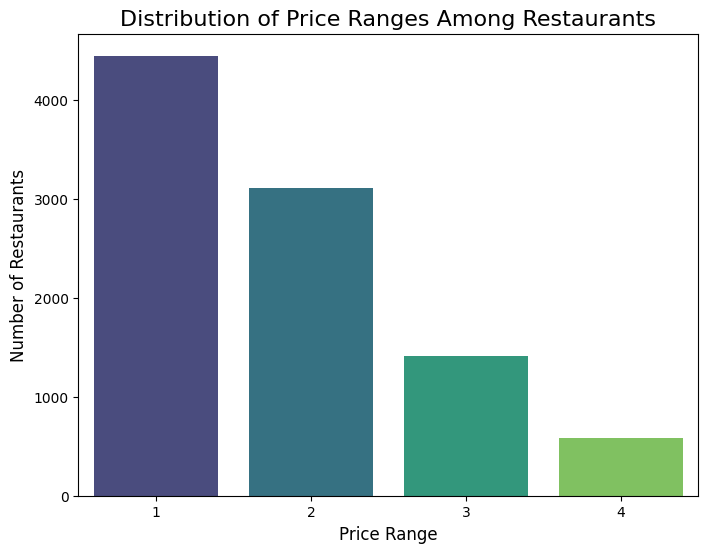

In [133]:
# Step 1: Count the number of restaurants in each price range
price_range_counts = df['Price range'].value_counts()

# Step 2: Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=price_range_counts.index, y=price_range_counts.values, palette='viridis')

# Step 3: Add titles and labels
plt.title('Distribution of Price Ranges Among Restaurants', fontsize=16)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)

# Display the plot
plt.show()


### 2. Calculate the percentage of restaurants in each price range category.

In [134]:
# Step 1: Count the number of restaurants in each price range
price_range_counts = df['Price range'].value_counts()

# Step 2: Calculate the total number of restaurants
total_num_of_restaurants = len(df)

# Step 3: Calculate the percentage for each price range
percentage_price_range = (price_range_counts / total_num_of_restaurants) * 100

# Step 4: Display the result
for price_range, percentage in percentage_price_range.items():
    print(f"Percentage of restaurants in Price Range {price_range}: {round(percentage, 2)}%")


Percentage of restaurants in Price Range 1: 46.53%
Percentage of restaurants in Price Range 2: 32.59%
Percentage of restaurants in Price Range 3: 14.74%
Percentage of restaurants in Price Range 4: 6.14%


### Summary Task 3

- The price range 1 has highest count of around 46.51 %
- The price range 4 has lowest count of around 6.14 %

#

## Task-4

<p align="center">
  <img src="Level-1 T-4.png" alt="Your Image Description" />
</p>


### 1. Determine the percentage of restaurants that offer online delivery.

In [135]:
# Step 1: Count the number of restaurants offering online delivery
restaurants_with_online_delivery = df[df['Has Online delivery'] == 'Yes']  # Assuming the column is 'Yes' for online delivery

# Step 2: Calculate the total number of restaurants
total_num_of_restaurants = len(df)

# Step 3: Calculate the percentage of restaurants offering online delivery
percentage_online_delivery = (len(restaurants_with_online_delivery) / total_num_of_restaurants) * 100

# Step 4: Display the result
print(f"Percentage of restaurants that offer online delivery: {round(percentage_online_delivery, 2)}%")


Percentage of restaurants that offer online delivery: 25.66%


### 2. Compare the average ratings of restaurants with and without online delivery.

In [136]:
# Step 1: Filter restaurants that offer online delivery
restaurants_with_online_delivery = df[df['Has Online delivery'] == 'Yes']

# Filter restaurants that do not offer online delivery
restaurants_without_online_delivery = df[df['Has Online delivery'] == 'No']

# Step 2: Calculate the average ratings for both groups
avg_rating_with_delivery = restaurants_with_online_delivery['Aggregate rating'].mean()
avg_rating_without_delivery = restaurants_without_online_delivery['Aggregate rating'].mean()

# Step 3: Display the results
print(f"Average rating of restaurants with online delivery: {round(avg_rating_with_delivery, 2)}")
print(f"Average rating of restaurants without online delivery: {round(avg_rating_without_delivery, 2)}")


Average rating of restaurants with online delivery: 3.25
Average rating of restaurants without online delivery: 2.47


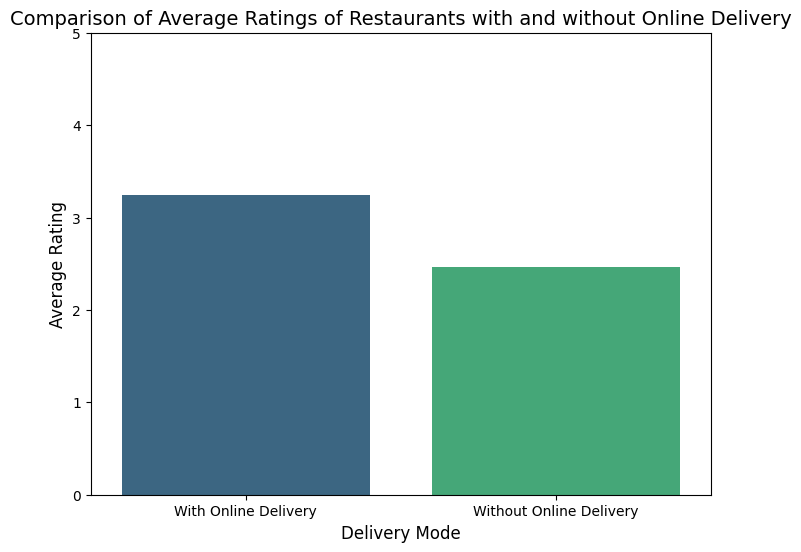

In [137]:
# Prepare data for the bar plot
delivery_status = ['With Online Delivery', 'Without Online Delivery']
average_ratings = [avg_rating_with_delivery, avg_rating_without_delivery]

plt.figure(figsize=(8, 6))  # Set figure size
sns.barplot(x=delivery_status, y=average_ratings, palette='viridis')

# Customize the plot
plt.title('Comparison of Average Ratings of Restaurants with and without Online Delivery', fontsize=14)
plt.xlabel('Delivery Mode', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.ylim(0, 5)  # Assuming the ratings are on a scale from 0 to 5

# Show the plot
plt.show()